<a href="https://colab.research.google.com/github/Ajb2307/DSPS_ABaldelli/blob/main/HW9/KS_earthquakes_new_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [38]:
#all the imports I needed
import pandas as pd
import pylab as pl
import scipy as sp
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

# This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The null hypothesis is that two data come from a same distribution. In this case we have to agree with the scaling law in earthquakes.

    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The maximum absolute difference between the two cdf.




    3 What does the probability distribution of this statistic depend on?
    
   


The probability depends on the sample sizes of two data sets.


    

# PART I:  Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [2]:
eqdata = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/earthquakes.csv",
            sep=r"\s+")


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [3]:
#note: the number of columns may be different depending on how you read the data in. The number of ROWs MUST be the same
eqdata.shape #also note: in class we used a different name for the dataframe

(70798, 13)

In [4]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49


In [5]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,70798.000000,70798.000000,70798.00000,70798.000000,7.079800e+04,70798.000000,70798.000000
mean,2.417826,33.977749,-116.88145,5.707677,3.699163e+06,30.424376,175.725049
std,0.407683,1.156586,1.07667,3.842620,3.495378e+06,22.374143,226.196774
min,2.000000,30.094830,-121.76000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.061000,-117.69200,3.100000,7.380962e+05,15.000000,59.000000
50%,2.300000,34.056750,-116.59000,5.300000,3.049477e+06,24.000000,111.000000
75%,2.590000,34.591000,-116.25100,6.900000,3.325926e+06,39.000000,211.000000
max,7.100000,37.985500,-113.71900,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [6]:

eqdata = eqdata[['#YYY/MM/DD', 'HH:mm:SS.ss', "MAG"]]
eqdata.rename({"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG":"mag" },
                   axis=1, inplace=True)

In [7]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [8]:
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [9]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [10]:
datetimes = []


for i in range(len(eqdata)):
    d = eqdata.loc[i, "date"]
    t = eqdata.loc[i, "time"]
    dt = pd.to_datetime(d + " " + t, format="%Y/%m/%d %H:%M:%S.%f", errors="coerce")
    datetimes.append(dt)


eqdata["datetime"] = datetimes

In [11]:


eqdata.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


## select valuable data
Starting here is stuff we did not do together in class but is part of the homework due on 9/17


Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [12]:
# your code here
def yearfrac_to_datetime(yf):
    year = int(yf)
    frac = yf - year
    total_seconds = round(frac * 365.25 * 24 * 3600)
    return pd.to_datetime(year, format="%Y") + pd.Timedelta(seconds=total_seconds)


intervals = [
    (1984, 1986.5), (1990.3, 1992.1), (1994.6, 1995.6),
    (1996.1, 1996.5), (1997, 1997.6), (1997.75, 1998.15),
    (1998.25, 1999.35), (2000.55, 2000.8), (2000.9, 2001.25),
    (2001.6, 2002), (2002.5, 2003)
]

ss = [(yearfrac_to_datetime(start), yearfrac_to_datetime(end)) for start, end in intervals]


In [13]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-02 15:00:00')),
 (Timestamp('1990-04-20 13:48:00'), Timestamp('1992-02-06 12:36:00')),
 (Timestamp('1994-08-08 03:36:00'), Timestamp('1995-08-08 03:36:00')),
 (Timestamp('1996-02-06 12:36:00'), Timestamp('1996-07-01 15:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 03:36:00')),
 (Timestamp('1997-10-01 22:30:00'), Timestamp('1998-02-24 18:54:00')),
 (Timestamp('1998-04-02 07:30:00'), Timestamp('1999-05-08 20:06:00')),
 (Timestamp('2000-07-19 21:18:00'), Timestamp('2000-10-19 04:48:00')),
 (Timestamp('2000-11-24 17:24:00'), Timestamp('2001-04-02 07:30:00')),
 (Timestamp('2001-08-08 03:36:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-02 15:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [14]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
print(ss)

the 11 timestamp pairs that are the boundaries of good data periods are:
[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-02 15:00:00')), (Timestamp('1990-04-20 13:48:00'), Timestamp('1992-02-06 12:36:00')), (Timestamp('1994-08-08 03:36:00'), Timestamp('1995-08-08 03:36:00')), (Timestamp('1996-02-06 12:36:00'), Timestamp('1996-07-01 15:00:00')), (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 03:36:00')), (Timestamp('1997-10-01 22:30:00'), Timestamp('1998-02-24 18:54:00')), (Timestamp('1998-04-02 07:30:00'), Timestamp('1999-05-08 20:06:00')), (Timestamp('2000-07-19 21:18:00'), Timestamp('2000-10-19 04:48:00')), (Timestamp('2000-11-24 17:24:00'), Timestamp('2001-04-02 07:30:00')), (Timestamp('2001-08-08 03:36:00'), Timestamp('2002-01-01 00:00:00')), (Timestamp('2002-07-02 15:00:00'), Timestamp('2003-01-01 00:00:00'))]


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [15]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [16]:
# your code here
gooddates = (((eqdata.datetime >= ss[0][0]) * (eqdata.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) * (eqdata.datetime <= ss[1][1])) +\
        ((eqdata.datetime >=ss [2][0]) * (eqdata.datetime <= ss[2][1])) +\
        ((eqdata.datetime >=ss [3][0]) * (eqdata.datetime <= ss[3][1])) +\
        ((eqdata.datetime >=ss [4][0]) * (eqdata.datetime <= ss[4][1])) +\
        ((eqdata.datetime >=ss [5][0]) * (eqdata.datetime <= ss[5][1])) +\
        ((eqdata.datetime >=ss [6][0]) * (eqdata.datetime <= ss[6][1])) +\
        ((eqdata.datetime >=ss [7][0]) * (eqdata.datetime <= ss[7][1])) +\
        ((eqdata.datetime >=ss [8][0]) * (eqdata.datetime <= ss[8][1])) +\
        ((eqdata.datetime >=ss [9][0]) * (eqdata.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) * (eqdata.datetime <= ss[10][1])\
        ).values)
gooddates

,datetime
0,True
1,True
2,True
3,True
4,True
...,...
70793,True
70794,True
70795,True
70796,True


In [17]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18854 earthquakes falling in the selected stationary periods


In [18]:
# your code here: broadcasting to create a dataframe with the good dates only
eqGoodData =  eqdata[gooddates]

In [19]:
eqGoodData.shape

(18854, 4)

In [20]:
eqGoodData.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [21]:
# your code here
mag_2 = eqGoodData["mag"] >= 2
eqGoodData = eqGoodData[mag_2]

In [22]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(18854, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (as done in class).


In [23]:
#your code here
eqGoodData["gaps"] = eqGoodData["datetime"].diff().dt.total_seconds() * 1e9




In [24]:
eqGoodData.shape

(18854, 5)

In [25]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,NaN
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13


In [26]:
eqGoodData.describe()

,mag,datetime,gaps
count,18854.000000,18854,1.885300e+04
mean,2.399386,1992-11-24 23:23:43.239262208,3.179987e+13
min,2.000000,1984-01-01 01:30:57.520000,1.700000e+08
25%,2.110000,1985-10-24 01:11:15.855000,2.733640e+12
50%,2.290000,1994-09-02 04:15:52.720000,8.938520e+12
75%,2.560000,1998-05-08 20:43:10.957500032,2.131018e+13
max,5.800000,2002-12-30 23:38:49.790000,1.199386e+17
std,0.392423,NaN,1.104074e+15


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [27]:
# your code here

eqGoodData = eqGoodData.dropna(subset=["gaps"]).reset_index(drop=True)

In [28]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
1,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
2,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
3,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
4,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

In [29]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8,6))
# plt.hist(eqGoodData["gaps"], bins=10, log=True, alpha=0.7)
# plt.xlabel("Inter-event time gaps (nanoseconds)")
# plt.ylabel("Frequency (log scale)")
# plt.title("Histogram of earthquake inter-event times (stationary periods, M ≥ 2)")
# plt.show()


This histogram shows the distribution of the time intervals between earthquakes during the stationary periods described in Corral 2018. The data is chosen as mag>=2 subset. The data shows a peak at 1*10^7 seconds.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [30]:

one_month_nanosec = 30 * 24 * 3600 * 1e9

eqGoodData_filtered = eqGoodData[eqGoodData["gaps"] <= one_month_nanosec]

# ax = eqGoodData_filtered["gaps"].plot(
#     kind="hist", bins=10, logy=True, figsize=(8,6), alpha=0.7
# )
# ax.set_xlabel("Inter-event time gaps (nanoseconds)")
# ax.set_ylabel("Frequency (log scale)")
# ax.set_title("Histogram of earthquake inter-event times (gaps ≤ 1 month)")

# plt.show()


This histogram shows the distribution of the time intervals between earthquakes during the stationary periods described in Corral 2018.after selecting for intervals less than or equal to one month long. The data is chosen as mag>=2 subset. Comparing with Fig 1, the histogram shows more continuity.

# PART II - data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [31]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
1,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
2,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
3,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
4,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


In [32]:
# your code here
mag_values = [2, 2.5, 3, 3.5, 4]
thresholds = [0.01, 0.001]
scaled_gaps = {0.01: {}, 0.001: {}}

for m in thresholds:
  for M_k in mag_values:
    # getting the gaps of the desired magnitude size
    X_Mk = eqGoodData_filtered[eqGoodData_filtered["mag"] >= M_k]["gaps"]
    for i in range(2): # doing a third time to ensure the mean at 1
    # Rescale the time gaps distribution by the mean value of the time gaps.
      Rk = 1 / np.mean(X_Mk)
      X_Mk = X_Mk * Rk # scaling x
      X_Mk = X_Mk[X_Mk>m] # filtering using the threshold

    # one final rescale to ensure the mean is at 1 (not necessary)
    Rk = 1 / np.mean(X_Mk)
    X_Mk = X_Mk * Rk # scaling x

    # save final dataset in a dictionary
    scaled_gaps[m][M_k] = X_Mk

In [42]:
mag_values

[2, 2.5, 3, 3.5, 4]

Text(0.5, 1.0, 'UNIMPROVED PLOT')

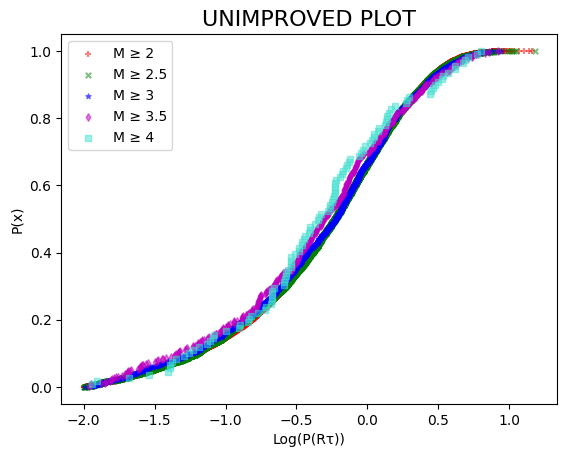

In [98]:
# plot
pl.plot(figsize=(12, 10))
m = 0.01
Mk = 2
colors = ["r", "g", "b", "m", "turquoise"]
markers = ["+", "x", "*", "d", "s"]

for i, Mk in enumerate(mag_values):

  X_Mk = scaled_gaps[m][Mk]
  N = len(X_Mk)

  x = np.sort(np.log10(X_Mk))

  p = np.arange(1/N, 1+1/N, 1/N)
  pl.scatter(x,p, label=f"M ≥ {Mk}", marker= markers[i], s = 15, color = colors[i], alpha = 0.5)
  pl.legend()

pl.ylabel("P(x)")
pl.xlabel("Log(P(Rτ))")
pl.title("UNIMPROVED PLOT", fontsize = "16")

Text(0.5, 0, 'x, time gap (ns)')

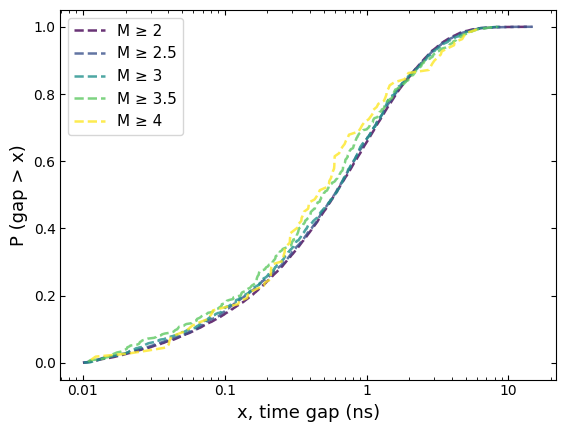

In [105]:
from logging import log
from matplotlib import lines
# plot
pl.plot(figsize=(8, 6))
m = 0.01
Mk = 2

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(mag_values)))



for i, Mk in enumerate(mag_values):

  X_Mk = scaled_gaps[m][Mk]
  N = len(X_Mk)

  x = np.sort(X_Mk)

  p = np.arange(1/N, 1+1/N, 1/N)
  pl.plot(x,p, label=f"M ≥ {Mk}", linewidth=1.8, linestyle="--",
             color = colors[i], alpha = 0.8)

  pl.legend(fontsize = 11)

pl.xscale("log")

pl.xticks([0.01, 0.1, 1, 10], [0.01, 0.1, 1, 10])
pl.tick_params(direction='in', which='both', top=True, right=True)
pl.ylabel("P (gap > x)", fontsize = 13)
pl.xlabel("x, time gap (ns)", fontsize = 13)


First I changed the labels so that they were more undertsandable and larger fonts. I also changed the x variable to be on its normal scale (as previously it was logged) and changed the axis to be logged. I believe this makes what is being plotted more clear. Previously this plot was a scatter plot to match the original plot, but this causes all the points to overlap one another, minimizing visability, even with a small alpha. To remedy this I changed the plot to use dashed line to clearly depict each line with transparency to see each line clearly. The previous plot used various colors with no linear progression, as these lines do have a numerical progression to the M values, I changed the colors to follow the 'viridis' color map. For readability I added ticks to the top and right of the graph as well.